In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, accuracy_score

In [3]:
os.chdir("../")

In [4]:
data_train = pd.read_csv('./data/road-train-pre.csv', error_bad_lines=False)
data_test = pd.read_csv('./data/road-test-pre.csv', error_bad_lines=False)

FileNotFoundError: [Errno 2] File ./data/road-train-pre.csv does not exist: './data/road-train-pre.csv'

In [186]:
data_train['event time:timestamp'] = pd.to_datetime(data_train['event time:timestamp'])
data_train = data_train.sort_values(by=['case concept:name', 'event time:timestamp'])

In [187]:
data_test['event time:timestamp'] = pd.to_datetime(data_test['event time:timestamp'])
data_test = data_test.sort_values(by=['case concept:name', 'event time:timestamp'])

In [188]:
#assign position of event as new column to train data
data_train['place']=data_train.groupby('case concept:name').cumcount()

In [189]:
#assign position of event as new column to test data
data_test['place']=data_test.groupby('case concept:name').cumcount()

In [190]:
cases = list(data_train['event concept:name'].unique())
cases.insert(0, 'New Case') # list of all unique event names
le = preprocessing.LabelEncoder()
le.fit(cases)  # encoding all event names into integers

LabelEncoder()

In [191]:
x_train = np.array(data_train['place']).reshape(-1,1)[:-1]
y_train = np.array(data_train['event concept:name']).reshape(-1,1)[1:]

In [192]:
#new list of features, containing previous event
x_train_prev = list(data_train['event concept:name'])
x_train_prev.insert(0, 'New Case')
x_train_prev= le.transform(x_train_prev)
x_train_prev = np.array(x_train_prev).reshape(-1,1)[:-2]

In [193]:
#combine the 2 features, place and previous event
x_train_new = np.concatenate((x_train,x_train_prev), axis=1)

In [194]:
#same for test data
x_test = np.array(data_test['place']).reshape(-1,1)[:-1]
y_test = np.array(data_test['event concept:name']).reshape(-1,1)[1:]

In [195]:
x_test_prev = list(data_test['event concept:name'])
x_test_prev.insert(0, 'New Case')
x_test_prev= le.transform(x_test_prev)
x_test_prev = np.array(x_test_prev).reshape(-1,1)[:-2]

In [196]:
x_test_new = np.concatenate((x_test,x_test_prev), axis=1)

In [197]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train_new, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [198]:
#fit decision tree on training data
prediction= classifier.predict(x_test_new).reshape(-1,1)

In [199]:
from sklearn.metrics import accuracy_score
#accuracy of the tree
acc = accuracy_score(y_test, prediction)
acc

0.4486248053969901

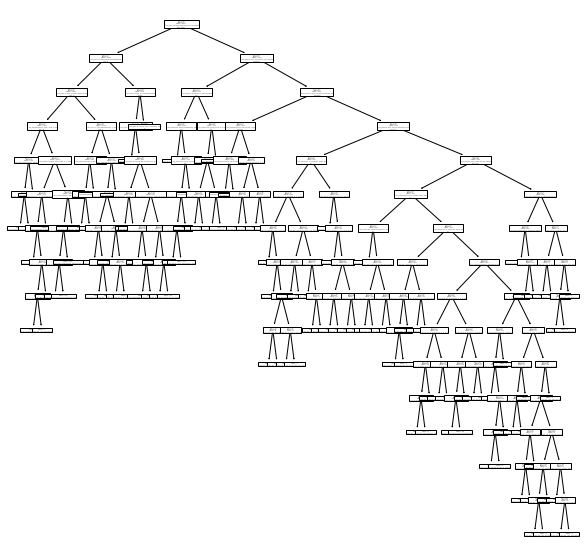

In [200]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 10,10
plt.rcParams.update({'font.size': 32})

tree.plot_tree(classifier);

In [201]:
from sklearn.tree.export import export_text
r = export_text(classifier, feature_names=['place', 'prev event'])
print(r)


|--- place <= 2.50
|   |--- place <= 1.50
|   |   |--- place <= 0.50
|   |   |   |--- prev event <= 2.50
|   |   |   |   |--- prev event <= 1.50
|   |   |   |   |   |--- prev event <= 0.50
|   |   |   |   |   |   |--- class: Send Fine
|   |   |   |   |   |--- prev event >  0.50
|   |   |   |   |   |   |--- class: Send Fine
|   |   |   |   |--- prev event >  1.50
|   |   |   |   |   |--- class: Create Fine
|   |   |   |--- prev event >  2.50
|   |   |   |   |--- prev event <= 7.50
|   |   |   |   |   |--- prev event <= 6.50
|   |   |   |   |   |   |--- prev event <= 3.50
|   |   |   |   |   |   |   |--- class: Send Fine
|   |   |   |   |   |   |--- prev event >  3.50
|   |   |   |   |   |   |   |--- prev event <= 5.50
|   |   |   |   |   |   |   |   |--- prev event <= 4.50
|   |   |   |   |   |   |   |   |   |--- class: Send Fine
|   |   |   |   |   |   |   |   |--- prev event >  4.50
|   |   |   |   |   |   |   |   |   |--- class: Create Fine
|   |   |   |   |   |   |   |--- prev event